# LGMVIP

## INTERMEDIATE LEVEL TASK 2

## PREDICTION USING DECISION TREE ALGORITHM.

# Problem Statement

## Create the Decision Tree classifier and visualize it graphically. 

## The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Link for the dataset : https://bit.ly/3kXTdox

## Importing modules form packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reading the dataset.

In [2]:
iris=pd.read_csv('C:\\Users\\HARINI\\Documents\\LGM_VIP_PROGRAMS\\DATA_SCIENCE\\IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [3]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.4           3.4          1.7           0.2          Iris-setosa        1
5.5           2.5          4.0           1.3          Iris-versicolor    1
              2.4          3.8           1.1          Iris-versicolor    1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 147, dtype: int64

## Data Visualisation

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

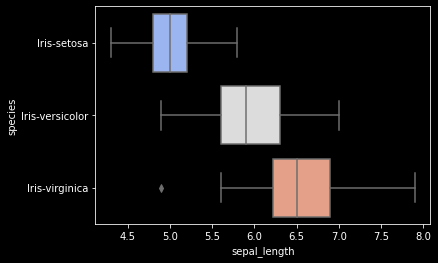

In [11]:
sns.boxplot(x="sepal_length",y="species",data=iris,palette="coolwarm")

<AxesSubplot:xlabel='petal_length', ylabel='species'>

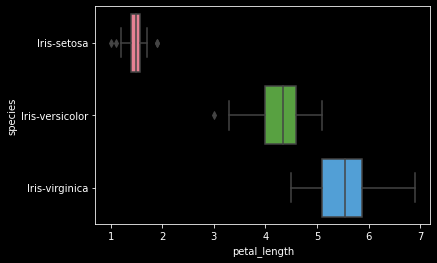

In [12]:
sns.boxplot(x="petal_length",y="species",data=iris,palette="husl")

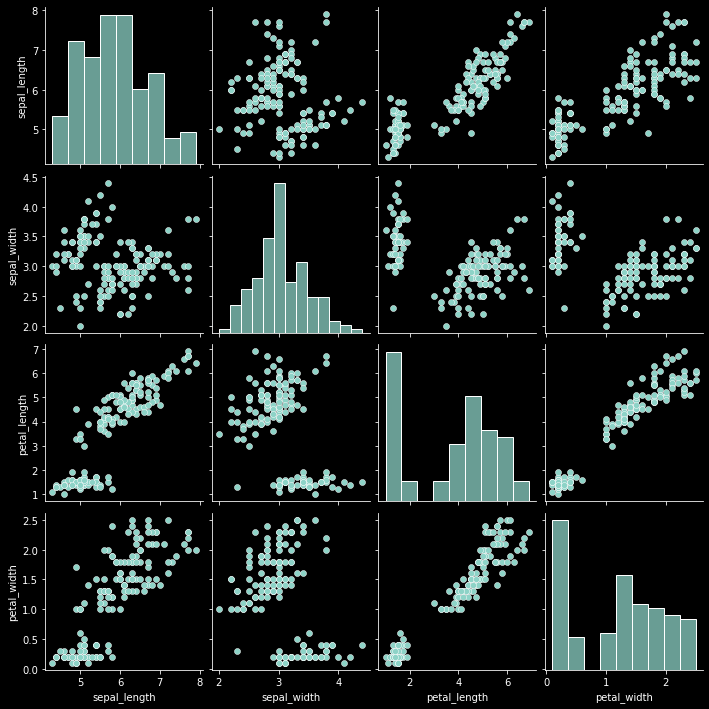

In [13]:
sns.pairplot(iris)

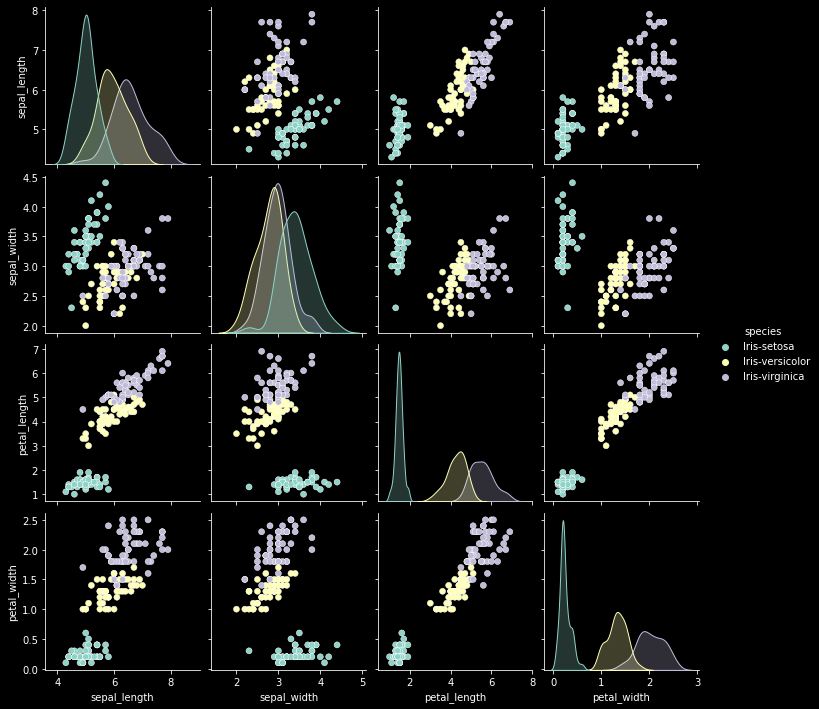

In [14]:
sns.pairplot(iris,hue='species')

In [15]:
#Finding Correlation and Visualising it.

In [16]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


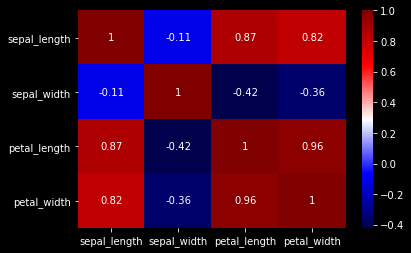

In [17]:
sns.heatmap(iris.corr(),annot=True,cmap='seismic')
plt.show()

## Procedure for Creating Decision Tree Classifier.

In [18]:
#Separating X (Feature matrix) and Y (vector of prediction)
X = iris.iloc[:,:-1].values
Y = iris.iloc[:,-1].values

In [19]:
# We need to perform label encoding on Y since ML cannot be able to identify or predict with string values.
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
Y=l.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#Train/Test Split
X_train,X_test,Y_Train,Y_Test=train_test_split(X,Y,random_state=100,test_size=0.30)

In [21]:
#Build ML Model
dt = DecisionTreeClassifier(max_depth=5)

In [22]:
#Using Fit transform function.
dt.fit(X_train,Y_Train)

DecisionTreeClassifier(max_depth=5)

In [23]:
#Accuracy of training set.
dt.score(X_train,Y_Train)

1.0

In [24]:
#Making Predictions
y_pred = dt.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [25]:
#Comparing Actual and Predicted Values
iris = pd.DataFrame({'Actual':Y_Test,'Predicted':y_pred})
iris.head()

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2


In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_Test,y_pred)
print(cm)
accuracy_score(Y_Test,y_pred)

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


0.9555555555555556

In [27]:
#Plot the Decision Tree Model Using Graphwiz
import graphviz
dot_data=tree.export_graphviz(dt,out_file=None,feature_names=iris.feature_names,filled=True)
graph=graphviz.Source()

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'